# Poisson relation  (Blakely, 1996)

In [1]:
# Importing all usefull libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definition for number of points and grid creation
n = 200
x = np.linspace(-1000., 1000., n)
y = np.copy(x)
z = np.random.normal(loc = -100., scale = 1., size = n)
# Creat the grid file
X, Y = np.meshgrid(x, y)

In [3]:
#Informations about the model - sphere
modelmag = [-400., 400., -400., 400., 50., 350., 1.5]
modelgrav = [-400., 400., -400., 400., 50., 350., 2673.]
# Inclination and declination (source and field)
incs, decs = 35., 22.
inc, dec = 55., -48.

In [4]:
# Importing modules
from codes.prism import prism_gz, prism_tf
from codes.filtering import reduction, pseudograv

In [5]:
# Calculating the total field anomaly and the vertical component
tf = prism_tf(X, Y, z, modelmag, inc, dec, incs, decs)
gz = prism_gz(X, Y, z, modelgrav)

In [6]:
# Applying the reduction to pole
rtp = reduction(X, Y, tf, inc, dec, incs, decs)

codes/auxiliars.py:187: RuntimeWarning: invalid value encountered in divide
  theta = z + ((x*u + y*v)/k)*1j


In [14]:
# Computing the pseudogravity anomaly
grav = pseudograv(X, Y, tf, inc, dec, incs, decs)

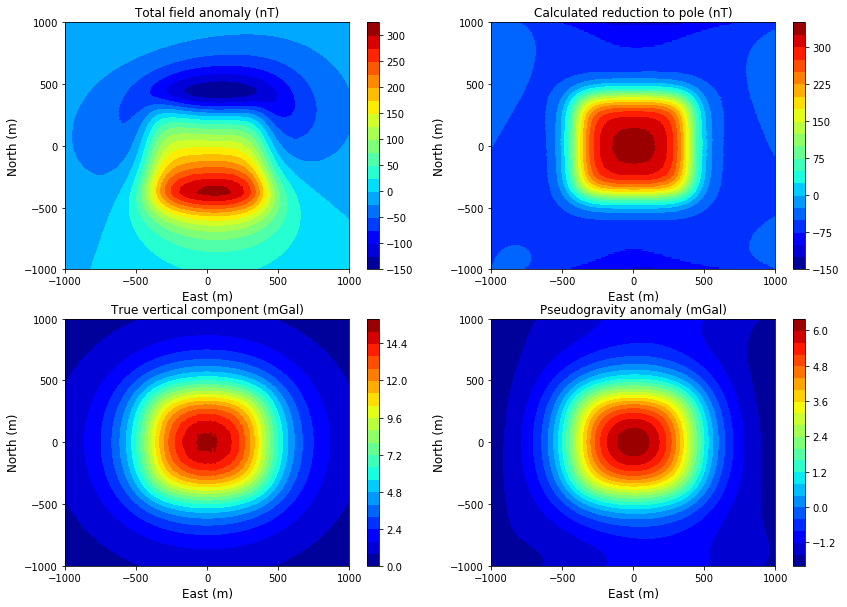

In [18]:
plt.close('all')
plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.contourf(Y, X, tf, 20, cmap = plt.cm.jet)
plt.title('Total field anomaly (nT)')
plt.xlabel('East (m)', fontsize = 12)
plt.ylabel('North (m)', fontsize = 12)
plt.xticks(np.linspace(x.min(), x.max(), 5))
plt.yticks(np.linspace(y.min(), y.max(), 5))
plt.colorbar()

plt.subplot(2, 2, 2)
plt.contourf(Y, X, rtp, 20, cmap = plt.cm.jet)
plt.title('Calculated reduction to pole (nT)')
plt.xlabel('East (m)', fontsize = 12)
plt.ylabel('North (m)', fontsize = 12)
plt.xticks(np.linspace(x.min(), x.max(), 5))
plt.yticks(np.linspace(y.min(), y.max(), 5))
plt.colorbar()

plt.subplot(2, 2, 3)
plt.contourf(X, Y, gz, 20, cmap = plt.cm.jet)
plt.title('True vertical component (mGal)')
plt.xlabel('East (m)', fontsize = 12)
plt.ylabel('North (m)', fontsize = 12)
plt.xticks(np.linspace(x.min(), x.max(), 5))
plt.yticks(np.linspace(y.min(), y.max(), 5))
plt.colorbar()
           
plt.subplot(2, 2, 4)
plt.contourf(X, Y, grav, 20, cmap = plt.cm.jet)
plt.title('Pseudogravity anomaly (mGal)')
plt.xlabel('East (m)', fontsize = 12)
plt.ylabel('North (m)', fontsize = 12)
plt.xticks(np.linspace(x.min(), x.max(), 5))
plt.yticks(np.linspace(y.min(), y.max(), 5))
plt.colorbar()

plt.savefig('figures/poisson.png', facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()